In [72]:
#!pip install scikit-learn
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

In [73]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from collections import Counter

In [74]:
# Carregar o dataset
df = pd.read_csv('dataset_tratado.csv')

features_numericas = [
    'popularity',       # popularidade do filme
    'budget',           # orçamento (de preferência em log)
    'runtime',          # duração do filme
    'vote_average',     # média dos votos
    'release_year',     # ano de lançamento
    'release_month',    # mês de lançamento
    # gêneros binarizados (one-hot encoding)
    'Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy',
    'Horror', 'Mystery', 'Outros', 'Romance', 'Science Fiction', 'Thriller'
]

X_numerico = df[features_numericas]

In [75]:
resultados = []

for n_clusters in [5, 7, 9]:
    pipeline = make_pipeline(
        StandardScaler(),
        KMeans(n_clusters=n_clusters, random_state=87, n_init=10)
    )
    pipeline.fit(X_numerico)
    labels = pipeline.named_steps['kmeans'].labels_
    counts = pd.Series(labels).value_counts().sort_index()
    resultados.append(
        pd.DataFrame({
            'n_clusters': n_clusters,
            'cluster': counts.index,
            'qtd_itens': counts.values
        })
    )

df_clusters = pd.concat(resultados, ignore_index=True)
display(df_clusters)


,n_clusters,cluster,qtd_itens
0,5,0,1580
1,5,1,1082
2,5,2,2167
3,5,3,1971
4,5,4,773
5,7,0,601
6,7,1,1169
7,7,2,1988
8,7,3,1311
9,7,4,724


## Método do cotovelo para definir a melhor quantidade de K

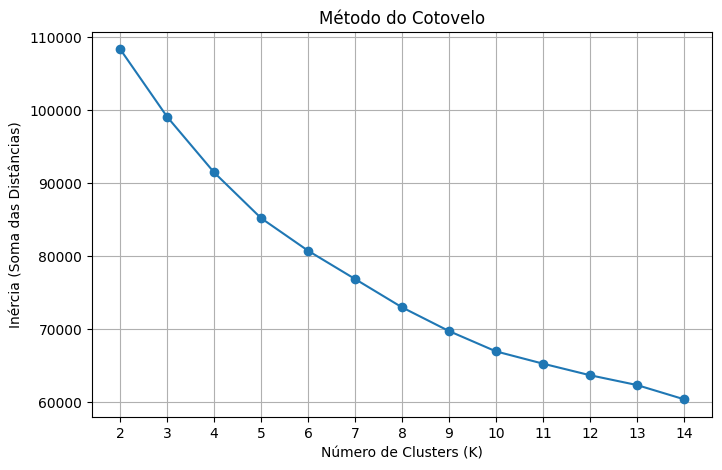

In [76]:
inertias = []
k_values = range(2, 15)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=87, n_init=10)
    kmeans.fit(StandardScaler().fit_transform(X_numerico))
    inertias.append(kmeans.inertia_)  # soma das distâncias aos centróides

# Plot do método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia (Soma das Distâncias)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

C:\Users\thalyson\AppData\Local\Temp\ipykernel_9944\959608152.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='qtd_itens', data=df_4_clusters, palette='viridis')


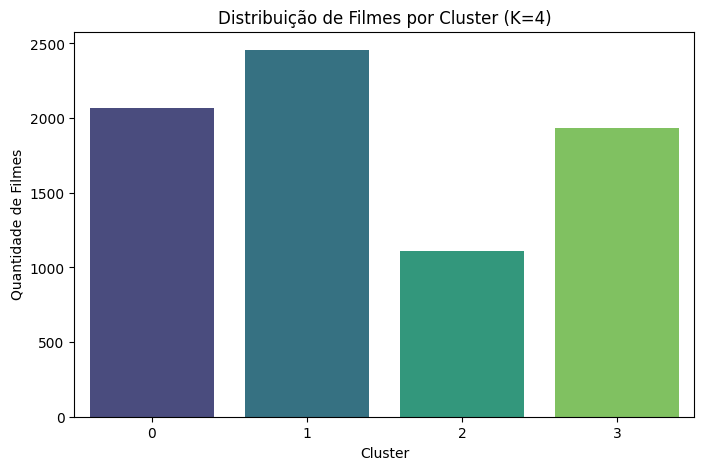

,popularity,budget,runtime,vote_average,release_year,release_month,Action,Adventure,Comedy,Crime,Drama,Family,Fantasy,Horror,Mystery,Outros,Romance,Science Fiction,Thriller
cluster_4,,,,,,,,,,,,,,,,,,,
0,14.769276,15.758451,102.360077,6.215303,2003.006283,6.538908,0.061382,0.047849,0.987434,0.084582,0.398260,0.0,0.0,0.001450,0.0,0.060899,0.365877,0.029000,0.011600
1,16.997776,15.606221,117.553746,6.868967,2001.745114,7.612378,0.087134,0.067997,0.051710,0.099349,0.915309,0.0,0.0,0.001629,0.0,0.380700,0.251221,0.024430,0.110342
2,21.601677,14.591394,94.700540,5.754791,2000.792266,6.744604,0.135791,0.038669,0.174460,0.050360,0.129496,0.0,0.0,0.972122,0.0,0.035072,0.017986,0.256295,0.445144
3,24.323455,16.314193,107.547004,6.185868,2003.848657,6.485537,0.762397,0.250000,0.134298,0.415806,0.321798,0.0,0.0,0.003099,0.0,0.067665,0.020145,0.211777,0.630682


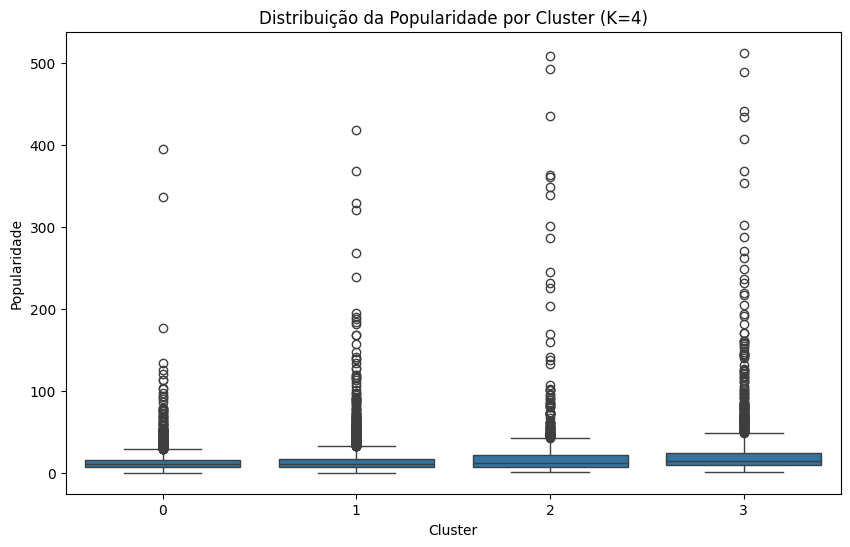

Cluster 0: 2069 filmes
Cluster 1: 2456 filmes
Cluster 2: 1112 filmes
Cluster 3: 1936 filmes

Clusters com poucos filmes geralmente agrupam obras com características muito distintas ou extremas, como orçamentos muito altos/baixos, popularidade fora do padrão ou anos de lançamento atípicos. Já clusters numerosos reúnem filmes com características mais comuns no dataset, formando grupos mais homogêneos e numerosos.



In [77]:
# Adicionar os rótulos dos clusters ao dataframe original (caso ainda não tenha sido feito)
pipeline_4 = make_pipeline(StandardScaler(), KMeans(n_clusters=4, random_state=87, n_init=10))
pipeline_4.fit(X_numerico)
labels_4 = pipeline_4.named_steps['kmeans'].labels_
df['cluster_4'] = labels_4

# Criar df_4_clusters com a contagem de filmes por cluster


contagem_4 = Counter(labels_4)
df_4_clusters = pd.DataFrame({
    'n_clusters': [4] * len(contagem_4),
    'cluster': list(contagem_4.keys()),
    'qtd_itens': list(contagem_4.values())
}).sort_values('cluster')

# Visualizar a distribuição de filmes por cluster
plt.figure(figsize=(8, 5))
sns.barplot(x='cluster', y='qtd_itens', data=df_4_clusters, palette='viridis')
plt.title('Distribuição de Filmes por Cluster (K=4)')
plt.xlabel('Cluster')
plt.ylabel('Quantidade de Filmes')
plt.show()

# Analisar as médias das variáveis numéricas por cluster
cluster_means_4 = df.groupby('cluster_4')[features_numericas].mean()
display(cluster_means_4)

# Visualizar a distribuição de um atributo relevante por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_4', y='popularity', data=df)
plt.title('Distribuição da Popularidade por Cluster (K=4)')
plt.xlabel('Cluster')
plt.ylabel('Popularidade')
plt.show()

# Análise textual
for idx, row in df_4_clusters.iterrows():
    print(f"Cluster {row['cluster']}: {row['qtd_itens']} filmes")

print("""
Clusters com poucos filmes geralmente agrupam obras com características muito distintas ou extremas, como orçamentos muito altos/baixos, popularidade fora do padrão ou anos de lançamento atípicos. Já clusters numerosos reúnem filmes com características mais comuns no dataset, formando grupos mais homogêneos e numerosos.
""")

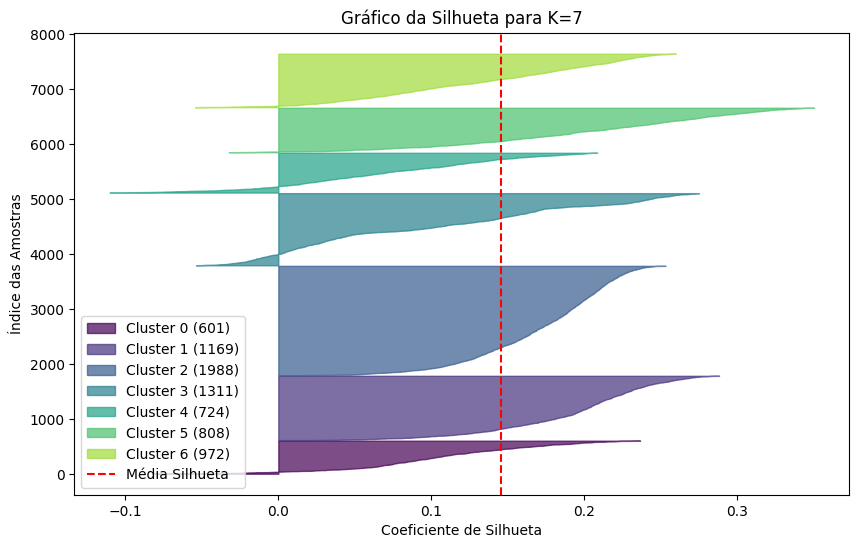

In [ ]:
# Calcular a silhueta para os clusters com K=7
silhouette_vals = silhouette_samples(StandardScaler().fit_transform(X_numerico), labels_7)
silhouette_avg = silhouette_score(StandardScaler().fit_transform(X_numerico), labels_7)

plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(7):
    ith_cluster_silhouette_values = silhouette_vals[labels_7 == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.viridis(float(i) / 7)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7,
                      label=f'Cluster {i} ({size_cluster_i})')
    y_lower = y_upper + 10  # espaço entre clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label='Média Silhueta')
plt.xlabel("Coeficiente de Silhueta")
plt.ylabel("Índice das Amostras")
plt.title("Gráfico da Silhueta para K=7")
plt.legend(loc='best')
plt.show()